### Optimal parameters 
- Parameter values that bring the model in closest argeement with the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

In [3]:
no_hitter = pd.read_csv('mlb_nohitters.csv', index_col='date', parse_dates=True)
modern_era = no_hitter.loc['1900-07-12':]
nohitter_times = modern_era['game_number'].diff() - 1
nohitter_times = np.array(nohitter_times[1:].values).astype(int)
nohitter_times

array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  3

In [4]:
np.random.seed(42)
tau = np.mean(nohitter_times)

In [5]:
inter_nohitter_time = np.random.exponential(tau, 100000)

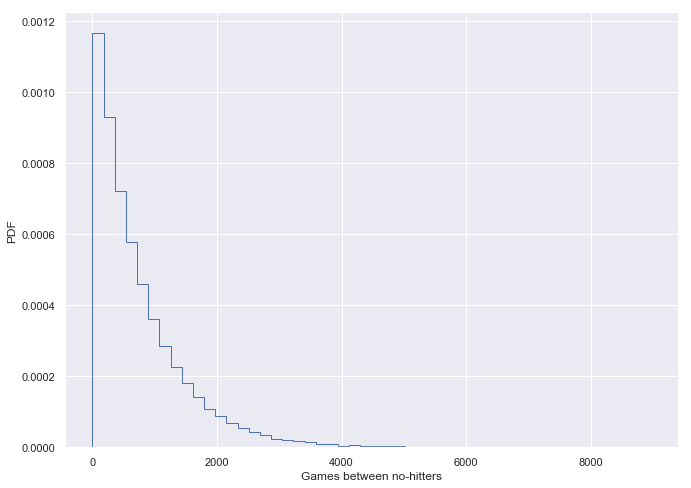

In [6]:
_ = plt.hist(inter_nohitter_time, bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [9]:
x, y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_time)

Text(0,0.5,'CDF')

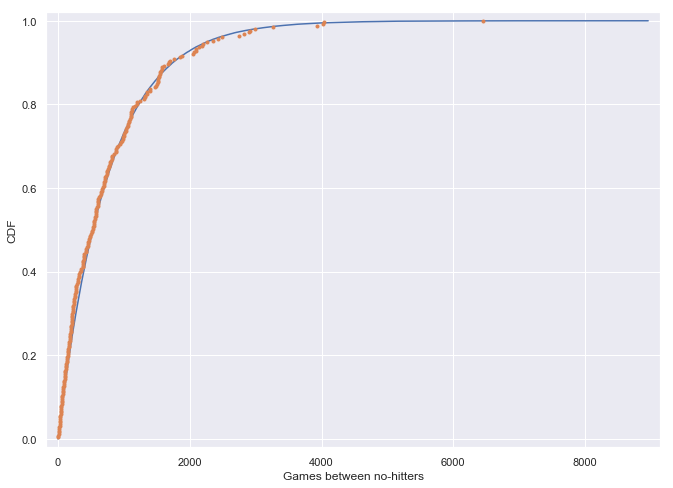

In [10]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

The story of the exponential distribution - represents a random process<br>
When a no-hitter occurs has no bearing on when the next no-hitter will occur

In [13]:
samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(2*tau, 10000)
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

Text(0,0.5,'CDF')

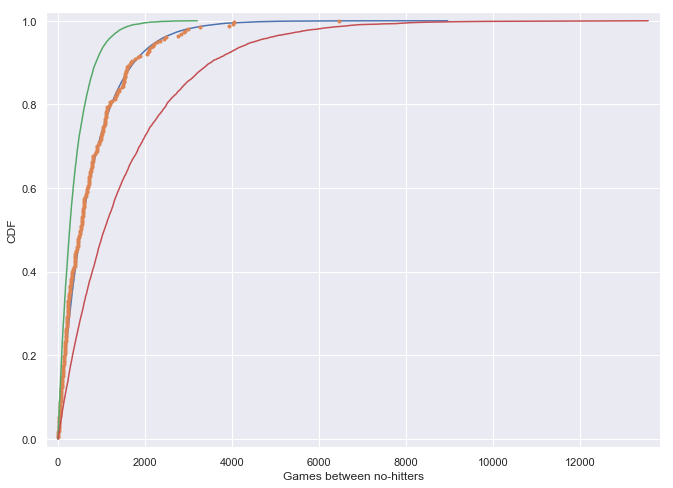

In [14]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

### Linear regression by least squares

### Least squares
- The process of finding the parameters for which the sum of the squares of the residuals in minimal

### Least squares with `np.polyfit()`

In [19]:
swing = pd.read_csv('2008_swing_states.csv')
dem_share = swing['dem_share']
total_votes = swing['total_votes']
slope, intercept = np.polyfit(total_votes,
                              dem_share, 1)
slope, intercept

(4.037071700946557e-05, 40.11391196864175)

In [20]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]